In [4]:
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv("/Users/sachinkelkar/desktop/ds-sf-29/data/SFPD_Incidents.csv")

In [8]:
data.head()

,﻿IncidntNum,Descript,DayOfWeek,Date,Time
0,150378090,INFLICT INJURY ON COHABITEE,Friday,05/01/2015,06:50
1,150000798,INFLICT INJURY ON COHABITEE,Thursday,01/01/2015,05:30
2,150589996,INFLICT INJURY ON COHABITEE,Tuesday,07/07/2015,08:00
3,150608643,INFLICT INJURY ON COHABITEE,Monday,07/13/2015,00:45
4,150608944,INFLICT INJURY ON COHABITEE,Monday,07/13/2015,08:20


In [10]:
data.tail()

,﻿IncidntNum,Descript,DayOfWeek,Date,Time
16259,150682164,INFLICT INJURY ON COHABITEE,Wednesday,08/05/2015,18:30
16260,150846304,INFLICT INJURY ON COHABITEE,Sunday,09/27/2015,02:15
16261,160014494,INFLICT INJURY ON COHABITEE,Tuesday,01/05/2016,21:30
16262,160024158,INFLICT INJURY ON COHABITEE,Saturday,01/09/2016,08:00
16263,160119210,INFLICT INJURY ON COHABITEE,Tuesday,02/09/2016,16:30


In [15]:
data.shape

(16264, 5)

In [13]:
dataII = pd.read_csv("/Users/sachinkelkar/desktop/ds-sf-29/data/SFPD_Incidents_II.csv")

In [14]:
dataIII = pd.read_csv("/Users/sachinkelkar/desktop/ds-sf-29/data/SFPD_Incidents_III.csv")

In [20]:
combo = data.append(dataII, ignore_index=True)

In [21]:
combo.shape

(23385, 5)

In [22]:
combos = combo.append(dataIII, ignore_index=True)

In [23]:
combos.shape

(40159, 5)

In [24]:
import datetime

In [43]:
df = combos.drop('\ufeffIncidntNum', axis=1)

In [44]:
dfII = df.drop('Descript', axis=1)

In [53]:
dfcount['Date'] = pd.to_datetime(combos.Date)

In [52]:
dfcount = dfII.drop('DayOfWeek', axis=1)

In [54]:
dfcount.sort("Date")

/Users/sachinkelkar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Date,Time
25965,2003-01-01,20:10
25823,2003-01-01,08:30
4592,2003-01-01,07:15
8040,2003-01-01,20:30
8080,2003-01-01,02:00
29601,2003-01-01,16:00
29612,2003-01-01,21:00
37084,2003-01-01,00:01
5580,2003-01-01,20:10
3600,2003-01-01,00:01


In [55]:
cols = dfcount.columns.tolist()
cols

['Date', 'Time']

In [57]:
SFDayCount = dfcount.groupby('Date').count()

In [89]:
SFDayCount.head()

,Time
Date,
2003-01-01,11
2003-01-02,10
2003-01-03,9
2003-01-04,8
2003-01-05,9


In [73]:
SFMonthCount = SFDayCount.groupby(pd.TimeGrouper(freq='M')).sum()

In [91]:
SFDayCount.max()

Time    30
dtype: int64

In [92]:
SFDayCount.mean()

Time    7.899095
dtype: float64

In [121]:
SFDayCount.loc[SFDayCount['Time'].idxmin()]

Time    1
Name: 2003-01-08 00:00:00, dtype: int64

In [94]:
SFDayCount.loc[SFDayCount['Time'].idxmax()]

Time    30
Name: 2011-01-01 00:00:00, dtype: int64

In [95]:
SFDayCount.describe()

,Time
count,5084.000000
mean,7.899095
std,3.714354
min,1.000000
25%,5.000000
50%,8.000000
75%,10.000000
max,30.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b418d68>]], dtype=object)

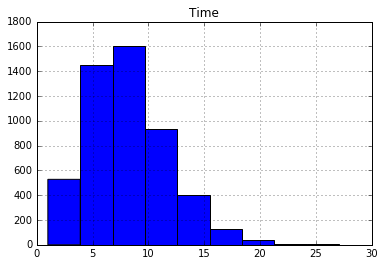

In [122]:
SFDayCount.hist()

In [74]:
SFMonthCount.head()

,Time
Date,
2003-01-31,220
2003-02-28,177
2003-03-31,193
2003-04-30,168
2003-05-31,182


In [77]:
SFMonthCount.tail()

,Time
Date,
2016-08-31,277
2016-09-30,309
2016-10-31,296
2016-11-30,335
2016-12-31,130


In [81]:
SFMonthCount = SFMonthCount.drop(SFMonthCount.tail(1).index)

In [82]:
SFMonthCount.tail()

,Time
Date,
2016-07-31,254
2016-08-31,277
2016-09-30,309
2016-10-31,296
2016-11-30,335


In [84]:
SFMonthCount.describe()

,Time
count,167.000000
mean,239.694611
std,54.949014
min,125.000000
25%,195.500000
50%,236.000000
75%,284.000000
max,358.000000


In [87]:
SFMonthCount.loc[SFMonthCount['Time'].idxmax()]

Time    358
Name: 2010-10-31 00:00:00, dtype: int64

In [115]:
SFMonthCount.loc[SFMonthCount['Time'].idxmin()]

Time    125
Name: 2005-08-31 00:00:00, dtype: int64

In [107]:
SFMonthCount.columns.tolist()

['Time']

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

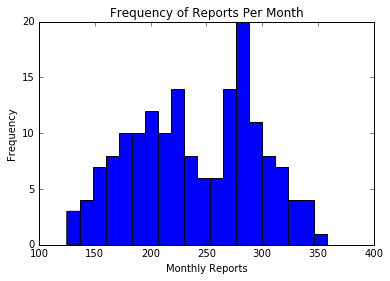

In [119]:
SFMonthCount.Time.plot(kind='hist', bins=20, title='Frequency of Reports Per Month')
plt.xlabel('Monthly Reports')
plt.ylabel('Frequency')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b552d30>]], dtype=object)

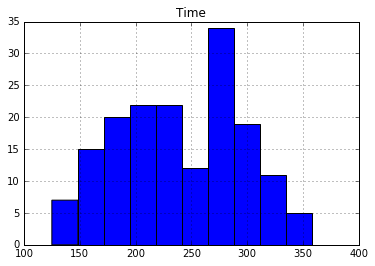

In [123]:
SFMonthCount.hist()

In [120]:
print(SFMonthCount.index)

DatetimeIndex(['2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-09-30', '2003-10-31',
               ...
               '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31',
               '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30',
               '2016-10-31', '2016-11-30'],
              dtype='datetime64[ns]', name='Date', length=167, freq='M')


In [173]:
SFMonthCount.nlargest(20, "Time")

,Time
Date,
2010-10-31,358
2011-03-31,342
2010-06-30,338
2013-05-31,337
2016-11-30,335
2015-07-31,334
2015-08-31,334
2010-07-31,324
2012-01-31,324


In [137]:
SFYearCount = SFDayCount.groupby(pd.TimeGrouper(freq='A')).sum()

In [139]:
SFYearCount.tail()

,Time
Date,
2012-12-31,3422
2013-12-31,3437
2014-12-31,3349
2015-12-31,3519
2016-12-31,3282


In [140]:
SFYearCount = SFYearCount.drop(SFYearCount.tail(1).index)

In [141]:
SFYearCount.tail()

,Time
Date,
2011-12-31,3553
2012-12-31,3422
2013-12-31,3437
2014-12-31,3349
2015-12-31,3519


In [142]:
SFYearCount

,Time
Date,
2003-12-31,2409
2004-12-31,2420
2005-12-31,1796
2006-12-31,2267
2007-12-31,2302
2008-12-31,2413
2009-12-31,2612
2010-12-31,3378
2011-12-31,3553


In [143]:
SFYearCount.describe()

,Time
count,13.000000
mean,2836.692308
std,613.535436
min,1796.000000
25%,2409.000000
50%,2612.000000
75%,3422.000000
max,3553.000000


In [171]:
SFDayCount.nlargest(20, "Time")

,Time
Date,
2011-01-01,30
2011-03-13,26
2013-06-30,25
2013-11-23,25
2010-10-31,24
2010-07-03,22
2012-01-01,22
2012-06-17,22
2014-02-02,22


In [144]:
SFDayCount.loc["2003-12-25"]

Time    7
Name: 2003-12-25 00:00:00, dtype: int64

In [145]:
SFDayCount.loc["2004-12-25"]

Time    3
Name: 2004-12-25 00:00:00, dtype: int64

In [146]:
SFDayCount.loc["2005-12-25"]

Time    6
Name: 2005-12-25 00:00:00, dtype: int64

In [147]:
SFDayCount.loc["2006-12-25"]

Time    6
Name: 2005-12-25 00:00:00, dtype: int64

In [148]:
SFDayCount.loc["2007-12-25"]

Time    6
Name: 2007-12-25 00:00:00, dtype: int64

In [149]:
SFDayCount.loc["2008-12-25"]

Time    5
Name: 2008-12-25 00:00:00, dtype: int64

In [150]:
SFDayCount.loc["2003-12-31"]

Time    7
Name: 2003-12-31 00:00:00, dtype: int64

In [151]:
SFDayCount.loc["2003-01-01"]

Time    11
Name: 2003-01-01 00:00:00, dtype: int64

In [152]:
SFDayCount.loc["2004-01-01"]

Time    8
Name: 2004-01-01 00:00:00, dtype: int64

In [153]:
SFDayCount.loc["2005-01-01"]

Time    13
Name: 2005-01-01 00:00:00, dtype: int64

In [154]:
SFDayCount.loc["2006-01-01"]

Time    15
Name: 2006-01-01 00:00:00, dtype: int64

In [155]:
SFDayCount.loc["2007-01-01"]

Time    13
Name: 2007-01-01 00:00:00, dtype: int64

In [156]:
SFDayCount.loc["2008-01-01"]

Time    16
Name: 2008-01-01 00:00:00, dtype: int64

In [157]:
SFDayCount.loc["2009-01-01"]

Time    14
Name: 2009-01-01 00:00:00, dtype: int64

In [158]:
SFWeekCount = SFDayCount.groupby(pd.TimeGrouper(freq='W')).sum()

In [159]:
SFWeekCount.head()

,Time
Date,
2003-01-05,47
2003-01-12,41
2003-01-19,48
2003-01-26,53
2003-02-02,45


In [160]:
SFWeekCount.tail()

,Time
Date,
2016-11-20,78
2016-11-27,82
2016-12-04,64
2016-12-11,67
2016-12-18,27


In [163]:
SFWeekCount = SFWeekCount.drop(SFWeekCount.tail(1).index)

In [164]:
SFWeekCount.describe()

,Time
count,728.000000
mean,55.126374
std,14.709118
min,19.000000
25%,44.000000
50%,55.000000
75%,66.000000
max,106.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c1d6c88>]], dtype=object)

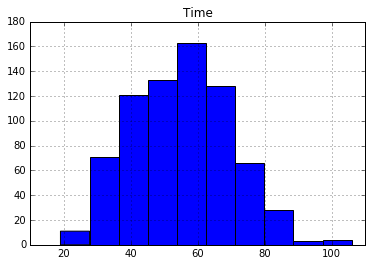

In [166]:
SFWeekCount.hist()

In [167]:
SFWeekCount.loc[SFWeekCount['Time'].idxmax()]

Time    106
Name: 2010-07-04 00:00:00, dtype: int64

In [169]:
SFWeekCount.nlargest(10, 'Time')

,Time
Date,
2010-07-04,106
2011-03-13,102
2013-10-27,100
2015-07-12,98
2011-01-02,93
2010-10-31,92
2013-05-19,91
2010-10-24,87
2013-05-12,87
